In [18]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [19]:
b, u, a30 = sp.symbols('b u a30')

I3_mod = 2*a30 * (3 * (1 - a30**2) * a30 + 2 * sp.cos(u) * (1 - a30**2)**(3/2) + b*a30)
a3val=0.3**0.5
I3_mod0 = I3_mod.subs({a30: a3val, u: 0}) 

print(I3_mod0)

0.6*b + 2.54312119458764


In [25]:
y, p3 = sp.symbols('y p3')
b_values = np.arange(-4, 4.1, 0.05)
#print(b_values)
y = 1

F = -13*p3**4 + p3**3 * (30 + 6*b) - p3**2 * (21 + 6*b + b**2 + I3_mod0*3) + p3*(4 + I3_mod0*b + I3_mod0*3) - I3_mod0**2/4
print(F.subs(p3,a3val**2).expand())

1.11022302462516e-16*b + 6.66133814775094e-16


In [26]:
sol_1 = []
for b_val in b_values:
    solution1 = sp.solve(F.subs(b, b_val), p3)
    #print(solution1)
    real_solutions1 = [sol.evalf() for sol in solution1 if sol.is_real]
    for elem in real_solutions1:
        sol_1.append((b_val, elem))
for elem in sol_1:
    print(elem)

(np.float64(-4.0), 0.00133392851783376)
(np.float64(-4.0), 0.300000000000000)
(np.float64(-3.95), 0.00196703239853298)
(np.float64(-3.95), 0.300000000000000)
(np.float64(-3.9000000000000004), 0.00272826481466485)
(np.float64(-3.9000000000000004), 0.300000000000000)
(np.float64(-3.8500000000000005), 0.00361979679507999)
(np.float64(-3.8500000000000005), 0.300000000000000)
(np.float64(-3.8000000000000007), 0.00464363197068703)
(np.float64(-3.8000000000000007), 0.300000000000000)
(np.float64(-3.750000000000001), 0.00580160595973801)
(np.float64(-3.750000000000001), 0.300000000000000)
(np.float64(-3.700000000000001), 0.00709538682711241)
(np.float64(-3.700000000000001), 0.300000000000001)
(np.float64(-3.6500000000000012), 0.00852647655435199)
(np.float64(-3.6500000000000012), 0.300000000000000)
(np.float64(-3.6000000000000014), 0.0100962134478108)
(np.float64(-3.6000000000000014), 0.300000000000000)
(np.float64(-3.5500000000000016), 0.0118057754050149)
(np.float64(-3.5500000000000016), 0.3

In [27]:
# Список для хранения результатов
results = []

# Решаем уравнение для различных значений b
for elem in sol_1:
    b_val = elem[0]
    real_solutions_p3 = elem[1]
    if real_solutions_p3:
        a3_val = real_solutions_p3  # Берем первое реальное решение
        # Подставляем в функцию f
        f = F.subs({b: b_val, p3: real_solutions_p3}) 
        results.append((real_solutions_p3, f))
print(len(results))
print("results:")
print(*results, sep='\n')

322
results:
(0.00133392851783376, -9.98482438223369e-18)
(0.300000000000000, -2.22044604925031e-15)
(0.00196703239853298, -3.93700913883799e-18)
(0.300000000000000, -1.33226762955019e-15)
(0.00272826481466485, -4.37746627141022e-18)
(0.300000000000000, -6.66133814775094e-16)
(0.00361979679507999, -3.69441890274436e-17)
(0.300000000000000, -4.44089209850063e-16)
(0.00464363197068703, -2.60208521396521e-17)
(0.300000000000000, 0)
(0.00580160595973801, 5.97937498125756e-17)
(0.300000000000000, 8.88178419700125e-16)
(0.00709538682711241, -6.98226199080665e-17)
(0.300000000000001, -1.99840144432528e-15)
(0.00852647655435199, 1.04083408558608e-17)
(0.300000000000000, -1.11022302462516e-15)
(0.0100962134478108, -3.88144377749811e-17)
(0.300000000000000, -8.88178419700125e-16)
(0.0118057754050149, 3.81639164714898e-17)
(0.300000000000000, -2.22044604925031e-16)
(0.0136561839541338, 1.82145964977565e-17)
(0.300000000000000, 2.22044604925031e-16)
(0.0156483089782787, -1.16660153759440e-16)
(0.3

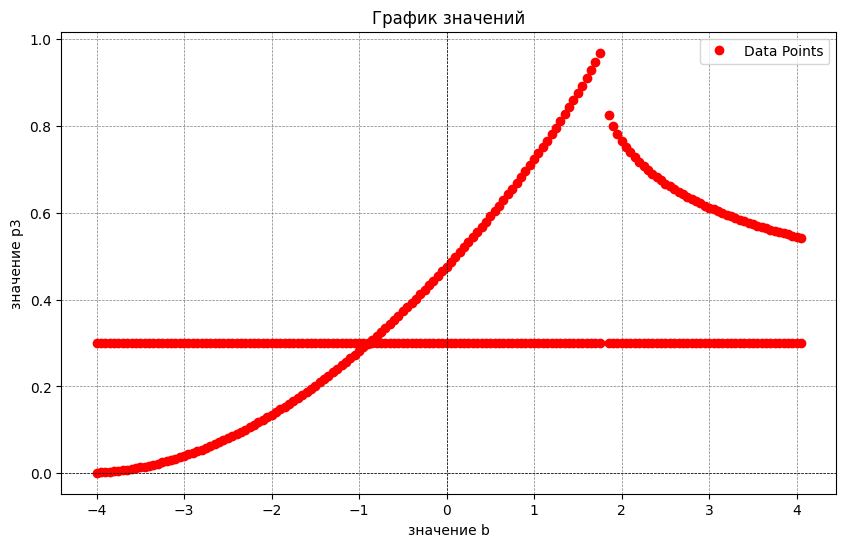

In [28]:
x, y = zip(*sol_1)  # Распаковываем кортежи в два списка

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='None', color='r', label='Data Points')

plt.title('График значений')
plt.xlabel('значение b')
plt.ylabel('значение p3')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()